In [2]:
import numpy
from matplotlib import pyplot as plot
from scipy import stats
%matplotlib inline

In [3]:
with open("3.txt") as file:
    data = numpy.array([float(line.split(',')[3]) for line in file])

'kek'

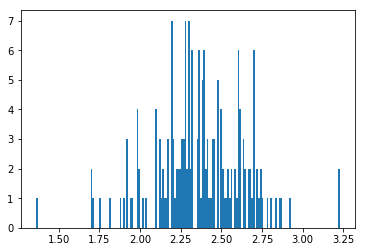

In [5]:
plot.hist(data, bins=len(data), normed=False)
'kek'

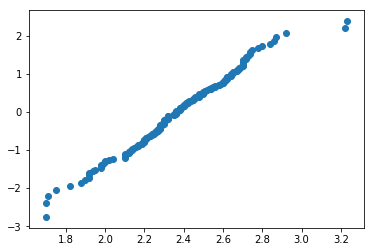

In [4]:
n = len(data)

def inverse_F(x):
    return stats.norm.isf(1 - x)

sorted_data = numpy.copy(data)
sorted_data.sort()
QQplot = numpy.array([(sorted_data[i], inverse_F((i - 0.5) / n)) for i in range(n)])
plot.scatter(QQplot[:,0], QQplot[:,1])

http://www.machinelearning.ru/wiki/index.php?title=Критерий_Шапиро-Уилка

$B=\Bigl(\sum_{j=1}^m a_j(x_{n-j}-x_j)\Bigr)^2$
$m=\left[\frac{n}{2}\right]; \; a_0=\frac{0,899}{\left(n-2,4\right)^{0,4162}}-0,02; \; a_j=a_0\left[z+\frac{1483}{(3-z)^{10,845}}+\frac{71,6\times10^{-10}}{(1,1-z)^{8,26}}\right]; \; z=\frac{n-2j+1}{n-0,5}$

$W_1=\left(1-\frac{0,6695}{n^{0,6518}}\right)\frac{s^2}{B}, $

In [5]:
m = round(len(data) / 2)

def z(j):
    return (n - 2 * j + 1) / (n - 0.5)

a = [(0.899) / (n - 2.4) ** 0.4162 - 0.02]
a.extend([
    a[0] * (
        z(j) + (1483) / (3 - z(j)) ** 10.845 + (71.6e-10) / (1.1 - z(j)) ** 8.26
    ) for j in range(1, m)
])

B = numpy.sum([a[j] * (data[n - j - 1] - data[j]) for j in range(m)]) ** 2
s2 = numpy.mean(data ** 2) - numpy.mean(data) ** 2
W_1 = (1 - (0.6695) / (n ** 0.6518)) * s2 / B

In [6]:
print(W_1)

13.0050341582


In [7]:
print(data.mean(), s2)

2.36651685393 0.0748418002777


$N(2.37, 0.075) ?$

In [9]:
stats.anderson(data, dist='logistic')

AndersonResult(statistic=0.42040773915101681, critical_values=array([ 0.425,  0.562,  0.659,  0.768,  0.905,  1.009]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))